In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("H:/TOPMENTOR/2024/April-month/April 7 Assignments/Assignment/Project - 1&2_ Simple_Reg/Salary_Data.csv")

In [3]:
data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Preprocessing of data

In [6]:
print("The number of rows and columns - ", data.shape)
print("The data types - ", data.dtypes)
print("The Number of Missing Records - ",data.isnull().sum())

The number of rows and columns -  (30, 2)
The data types -  YearsExperience    float64
Salary             float64
dtype: object
The Number of Missing Records -  YearsExperience    0
Salary             0
dtype: int64


In [7]:
##Exploratory Data Analysis 

In [8]:
print(data.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


In [9]:
print(data.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


C:\Users\vemul\AppData\Local\Temp\ipykernel_13600\2106005152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data['YearsExperience'])


0.37956024064804106


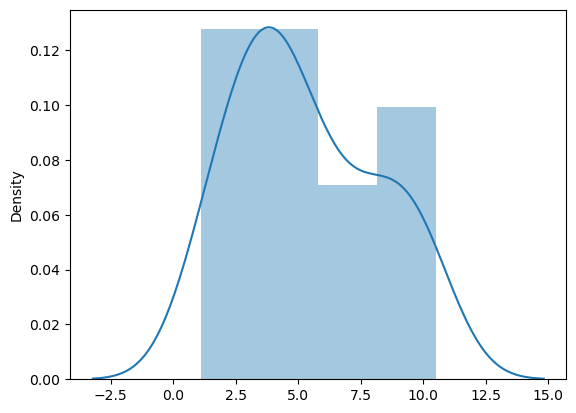

In [10]:
sns.distplot(x = data['YearsExperience'])
plt.savefig("YearsExperience-distplot.jpg", dpi=300)
print(data['YearsExperience'].skew())

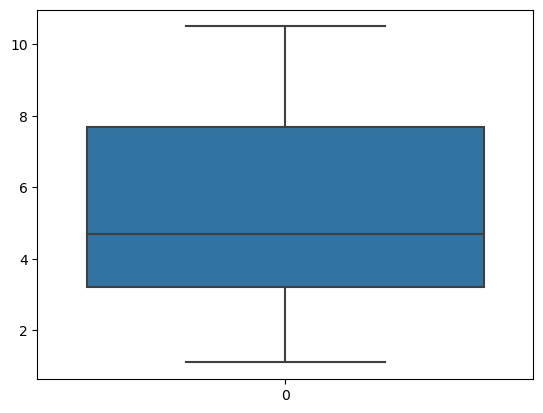

In [11]:
sns.boxplot(data['YearsExperience'])
plt.savefig("YearsExperience-boxplot.jpg", dpi=300)

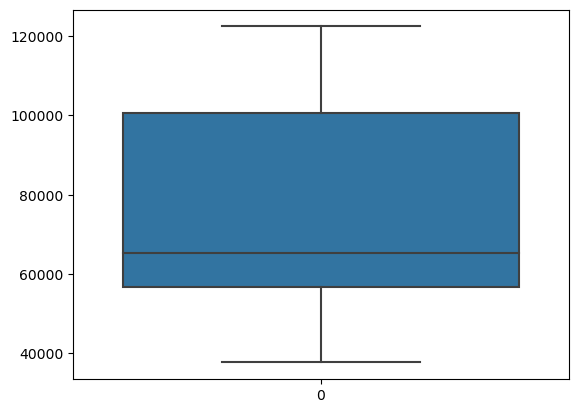

In [12]:
sns.boxplot(data['Salary'])
plt.savefig("Salary-boxplot.jpg", dpi=300)

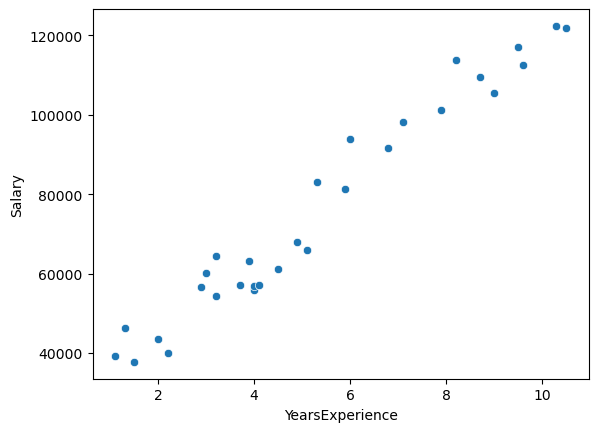

In [13]:
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'])
plt.savefig("YearsExperience-Salary_scatterplot.jpg", dpi=300)

## Splitting the Data into Training and Testing

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = data['YearsExperience'].values.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [17]:
y = data['Salary'].values.reshape(-1,1)
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [18]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
X_train.shape, X_test.shape

((24, 1), (6, 1))

### Modelling Part

In [20]:
model = LinearRegression()
#### Train the Model with Training Data ----
model_train = model.fit(X_train, y_train)
print("Model Training is Completed")

Model Training is Completed


In [21]:
print("Model coefficient =",model.coef_)
print("Model intercept =",model.intercept_)

Model coefficient = [[9717.46554733]]
Model intercept = [24013.14517637]


In [22]:
#### Validate the Model
pred = model.predict(X_test)
pred

array([[ 53165.54181837],
       [ 36645.8503879 ],
       [ 73572.21946776],
       [126046.53342336],
       [ 93007.15056243],
       [116329.06787602]])

In [23]:
#rsquare values  - to check the strength of the Model - 0 to 1
### if it is closer to 1 , that means the Model is Strong , closer to 0 weak model
##### mean squared error / root mean squared error 

from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [25]:
print(round(r2_score(y_test,pred),2))
print(round(mean_squared_error(y_test,pred),2))  #### as less as possible
print(round(sqrt(mean_squared_error(y_test,pred)),2))  ### rmse - should be within 0

0.95
40437595.01
6359.06
